In [1]:
import pandas as pd
import numpy as np
from keras import models,layers
import os,shutil
from keras.preprocessing.image import ImageDataGenerator 

Using TensorFlow backend.


In [2]:
train_dir = 'F:/Development/Data Science & ML/Cavvo computer vision challenge/dataset/train'
validation_dir = 'F:/Development/Data Science & ML/Cavvo computer vision challenge/dataset/validation'

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   featurewise_center=False,  # set input mean to 0 over the dataset
                                    samplewise_center=False,  # set each sample mean to 0
                                    featurewise_std_normalization=False,  # divide inputs by std of the dataset
                                    samplewise_std_normalization=False,  # divide each input by its std
                                    zca_whitening=False,  # apply ZCA whitening
                                    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
                                    zoom_range = 0.1, # Randomly zoom image 
                                    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
                                    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
                                    horizontal_flip=False,  # randomly flip images
                                    vertical_flip=False)
val_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
train_generator = train_datagen.flow_from_directory(
    train_dir,target_size=(100, 100),batch_size=270,
    class_mode='categorical')

Found 50771 images belonging to 15 classes.


In [5]:
val_generator = val_datagen.flow_from_directory(
    validation_dir,target_size=(100, 100),batch_size=30,
    class_mode='categorical')

Found 11487 images belonging to 15 classes.


In [6]:
clf = models.Sequential()

In [7]:
clf.add(layers.Conv2D(32, (3,3), activation='relu',input_shape = (100,100,3)))
clf.add(layers.MaxPooling2D((2, 2)))
clf.add(layers.Dropout(0.25))
clf.add(layers.Conv2D(32, (3, 3), activation='relu'))
clf.add(layers.MaxPooling2D((2, 2)))
clf.add(layers.Dropout(0.25))
clf.add(layers.Conv2D(128, (3, 3), activation='relu'))
clf.add(layers.MaxPooling2D((2, 2)))
clf.add(layers.Dropout(0.25))
clf.add(layers.Conv2D(128, (3, 3), activation='relu'))
clf.add(layers.MaxPooling2D((2, 2)))
clf.add(layers.Dropout(0.25))
clf.add(layers.Flatten())
clf.add(layers.Dense(256, activation='relu'))
clf.add(layers.Dropout(0.25))
clf.add(layers.Dense(15, activation='softmax'))

In [8]:
clf.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 128)       36992     
__________

In [9]:
from keras import optimizers,metrics

In [10]:
clf.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['acc'])

In [11]:
history = clf.fit_generator(train_generator,steps_per_epoch=210,epochs=2,
                            validation_data=val_generator,validation_steps=383)

Epoch 1/2
210/210 [==============================] - 2944s 14s/step - loss: 2.3888 - acc: 0.1914 - val_loss: 2.4182 - val_acc: 0.1805
Epoch 2/2
210/210 [==============================] - 2712s 13s/step - loss: 2.2395 - acc: 0.2396 - val_loss: 2.3062 - val_acc: 0.2528


In [12]:
clf.save('../base_CNN_1.h5')

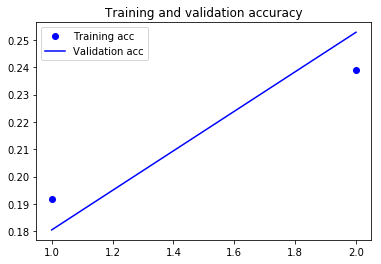

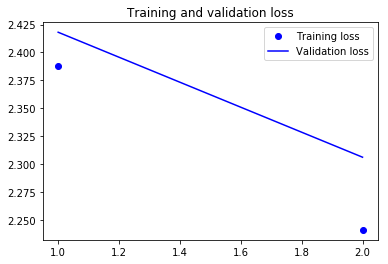

In [15]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

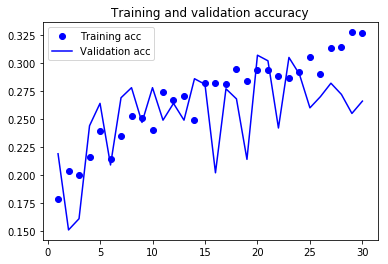

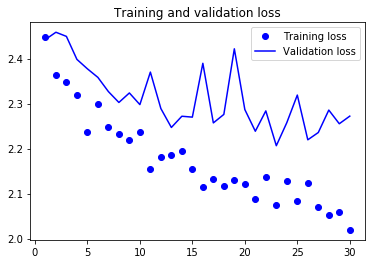

In [15]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
9plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [16]:
test_dir = 'F:/Development/Data Science & ML/Cavvo computer vision challenge/dataset/test'
test_datagen = ImageDataGenerator(rescale=1./255)

In [17]:
test_generator = test_datagen.flow_from_directory(
    test_dir,target_size=(100, 100),batch_size=1,
    color_mode = 'rgb',shuffle = "false",
    class_mode = 'categorical'
    )

Found 21273 images belonging to 1 classes.


In [18]:
file_nm = test_generator.filenames

In [19]:
result = clf.predict_generator(test_generator,steps=len(file_nm))

In [20]:
set(result.argmax(axis=1))

{1, 2, 3, 4, 5, 7, 8, 9, 11, 12, 13, 14}

In [21]:
result[0].argmax()
result[0]

array([ 0.02533887,  0.12873791,  0.1434819 ,  0.02305045,  0.09443192,
        0.014844  ,  0.01068671,  0.08963659,  0.09122001,  0.0953403 ,
        0.0223978 ,  0.0885651 ,  0.06329291,  0.06068059,  0.04829501], dtype=float32)

In [22]:
pred = []
for i in result:
    pred.append(i.argmax())

In [24]:
sorted(os.listdir('../dataset/train/'))

['0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9']

In [25]:
def mapp(x):
    if x == 10:
        return 2
    elif x==11:
        return 3
    elif x==12:
        return 4
    elif x==13:
        return 5
    elif x==14:
        return 6
    elif x==2:
        return 7
    elif x==3:
        return 8
    elif x==4:
        return 9
    elif x==5:
        return 10
    elif x==6:
        return 11
    elif x==7:
        return 12
    elif x==8:
        return 13
    elif x==9:
        return 14
    else:
        return x
    

In [26]:
y_pred = []
for i in pred:
    y_pred.append(mapp(i))

In [27]:
sub = pd.DataFrame()
files = []

In [28]:
for i in file_nm:
    files.append(i[5:])

In [29]:
sub['image_name'] = files

In [30]:
sub['category'] = y_pred

In [31]:
sub.to_csv('../Submissions/CNN1.csv',index=False)

In [32]:
sub1 = pd.read_csv('../Submissions/submission1.csv')
sub2 = pd.read_csv('../Submissions/CNN1.csv')

In [33]:
sub1.head()

,image_name,category
0,n02667093_10298_0.jpg,11
1,n02667093_1089_0.jpg,11
2,n02667093_113_0.jpg,11
3,n02667093_1142_0.jpg,11
4,n02667093_1172_0.jpg,11


In [34]:
sub2.head()

,image_name,category
0,n02667093_10298_0.jpg,7
1,n02667093_1089_0.jpg,13
2,n02667093_113_0.jpg,3
3,n02667093_1142_0.jpg,14
4,n02667093_1172_0.jpg,6


In [20]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [23]:
a = MinMaxScaler().fit_transform(np.array([2,4,6,-2]).reshape(-1,1))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [24]:
a

array([[ 0.5 ],
       [ 0.75],
       [ 1.  ],
       [ 0.  ]])